In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from paderbox.visualization import axes_context, plot
from matplotlib import pyplot as plt
from cycler import cycler

In [3]:
# https://stackoverflow.com/a/60270421/16085876
def bar_plot(
    ax, data, colors=None, total_width=0.8, single_width=1, legend=True,
    mean_line=True, patterns=None,
):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.

    mean_line: bool, optional, default: True
        Draw a mean line for each type.
    """
    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    if patterns is None:
        patterns = [''] * len(colors)

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []
    heights = np.zeros((n_bars, len(list(data.values())[0])))

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(
                x + x_offset, y, width=bar_width * single_width,
                color=colors[i % len(colors)],
                hatch=patterns[i % len(patterns)],
                edgecolor='k',
            )
            heights[i, x] = y

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])
    
    if mean_line:
        mean_heights = np.mean(heights, axis=0)
        for i, mean_height in enumerate(mean_heights):
            ax.hlines(
                mean_height,
                i - n_bars / 2 * single_width * bar_width,
                i + n_bars / 2 * single_width * bar_width,
                colors='k', linestyles='dashed',
            )

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())


In [4]:
eers = {
    r'$\gamma=10^{-3}$': [1.17, 1.73, 3.82],
    # noc:/scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_22
    # noc:/scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_25
    #  noctua2: /scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_5
    r'$\gamma=3\times10^{-3}$': [1.32, 1.98, 4.48],
    # noc:/scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_23
    # noc:/scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_26
    # noctua2: /scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_6
    r'$\gamma=10^{-2}$': [1.30, 2.21, 4.20],
    # noc:/scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_24
    # noc:/scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_27
    # noc:/scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_29
    r'$\gamma=3\times10^{-2}$': [1.58, 2.26, 3.38],
    # noctua2:/scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_9/sweep_0
    # noctua2:/scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_10/sweep_0
    # noc:/scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_30
    r'$\gamma=10^{-1}$': [1.65, 2.59, 3.87],
    # noctua2:/scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_9/sweep_1
    # noctua2:/scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_ssd_3
    # noc:/scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_31
    r'$\alpha=\gamma=\beta$': [1.04, 1.98, 3.59],
}

WSEPINs = {
    # r'$\gamma=10^{-3}$': [.255, .265, .236],
    r'$\gamma=10^{-3}$': [.094, .122, .118],
    # r'$\gamma=3\times10^{-3}$': [.260, .287, .259],
    r'$\gamma=3\times10^{-3}$': [.112, .145, .170],
    # r'$\gamma=10^{-2}$': [.268, .323, .264],
    r'$\gamma=10^{-2}$': [.127, .184, .141],
    # r'$\gamma=3\times10^{-2}$': [.298, .319, .301],
    r'$\gamma=3\times10^{-2}$': [.166, .184, .182],
    # r'$\gamma=10^{-1}$': [.326, .380, .360],
    r'$\gamma=10^{-1}$': [.200, .236, .230],
    # r'$\alpha=\gamma=\beta$': [.248, .250, .263],
    r'$\alpha=\gamma=\beta$': [.090, .118, .150],
}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


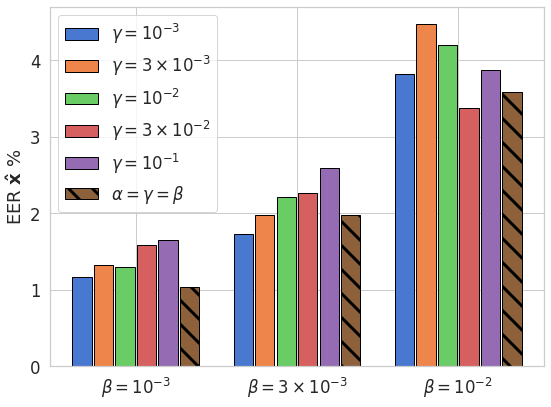

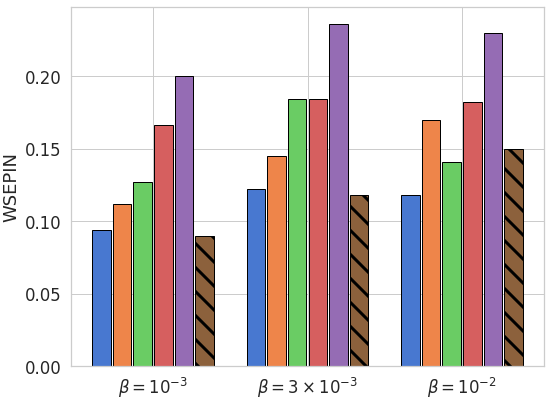

In [5]:
plt.rcParams['hatch.linewidth'] = 3
# plt.rcParams['hatch.color'] = 'white'  # Does not work

with axes_context(font_scale=1.5) as axes:
    ax = axes.new
    bar_plot(
        ax, eers, total_width=.8, single_width=.9, mean_line=False,
        patterns=['', '', '', '', '', '\\']
    )
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(
        [r'$\beta=10^{-3}$', r'$\beta=3\times10^{-3}$', r'$\beta=10^{-2}$']
    )
    ax.set_ylabel(r'EER $\mathbf{\hat{x}}$ %')
    plt.tight_layout()
    plt.savefig('eer_beta_gamma.eps', bbox_inches='tight')
    
    ax = axes.new
    bar_plot(
        ax, WSEPINs, total_width=.8, single_width=.9, mean_line=False,
        legend=False, patterns=['', '', '', '', '', '\\']
    )
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(
        [r'$\beta=10^{-3}$', r'$\beta=3\times10^{-3}$', r'$\beta=10^{-2}$']
    )
    ax.set_ylabel('WSEPIN')
    plt.tight_layout()
    plt.savefig('wsepin_beta_gamma.eps', bbox_inches='tight')